In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv("../data/power_demand_arrange.csv")

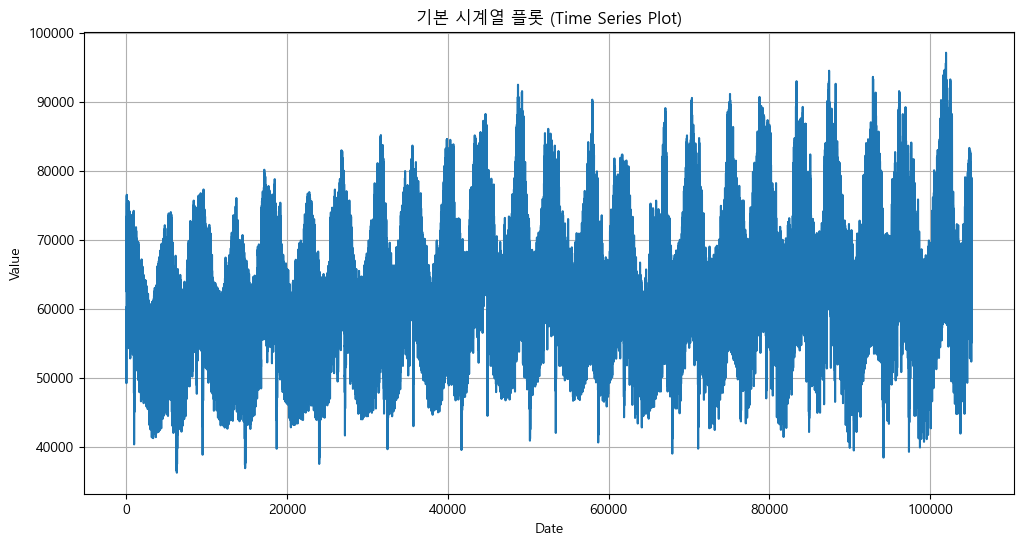

In [ ]:
# 갈수록 파동이 커지는 전력 소모량?

plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 1])
plt.title("기본 시계열 플롯 (Time Series Plot)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
import datetime as dt

df["날짜"] = pd.to_datetime(df["날짜"])
sample = df[
    (df["날짜"] >= dt.datetime(year=2023, month=1, day=1))
    & (df["날짜"] <= dt.datetime(year=2024, month=1, day=1))
]

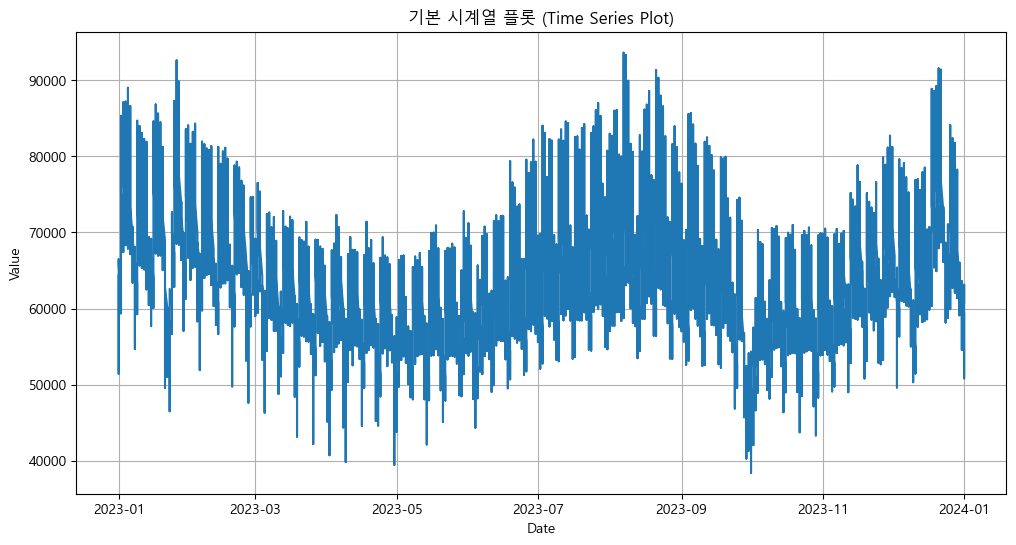

In [65]:
# 12 / 1 / 2 => 겨울
# 7 / 8 / 9 => 여름
# 가장 많이 소비하는 날짜

plt.figure(figsize=(12, 6))
plt.plot(sample.iloc[:, 0], sample.iloc[:, 1])
plt.title("기본 시계열 플롯 (Time Series Plot)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## STL, Strength of Seasonality, Strength of Trend
 - 강한 장기적 상승 추세
 - 뚜렷한 연간 계절성
 - 그 안의 더 짧은 주기의 계절성

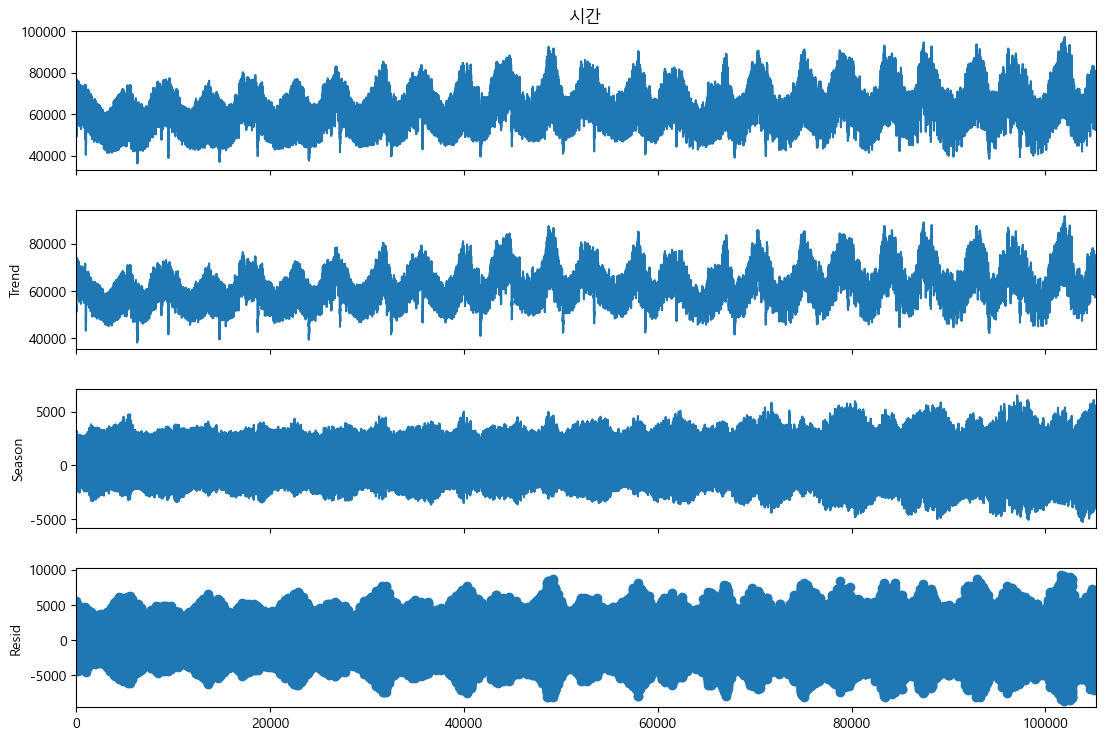

In [66]:
# STL 분해 (period는 계절성의 주기를 지정)
stl = STL(df["시간"], period=12)
result = stl.fit()

# 분해 결과 시각화
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

## ACF, PACF
 - ACF: 
 - 매우 천천히 감소: 강한 추세가 존재하며, 비 정상성 데이터라는 증거. 차분이 필요함
 - 물결 모양: 강한 계절성
 - PACF:
 - Lag 1에서 매우 큰 양의 값. 현재 값이 직전 값에 매우 큰 영향을 받음

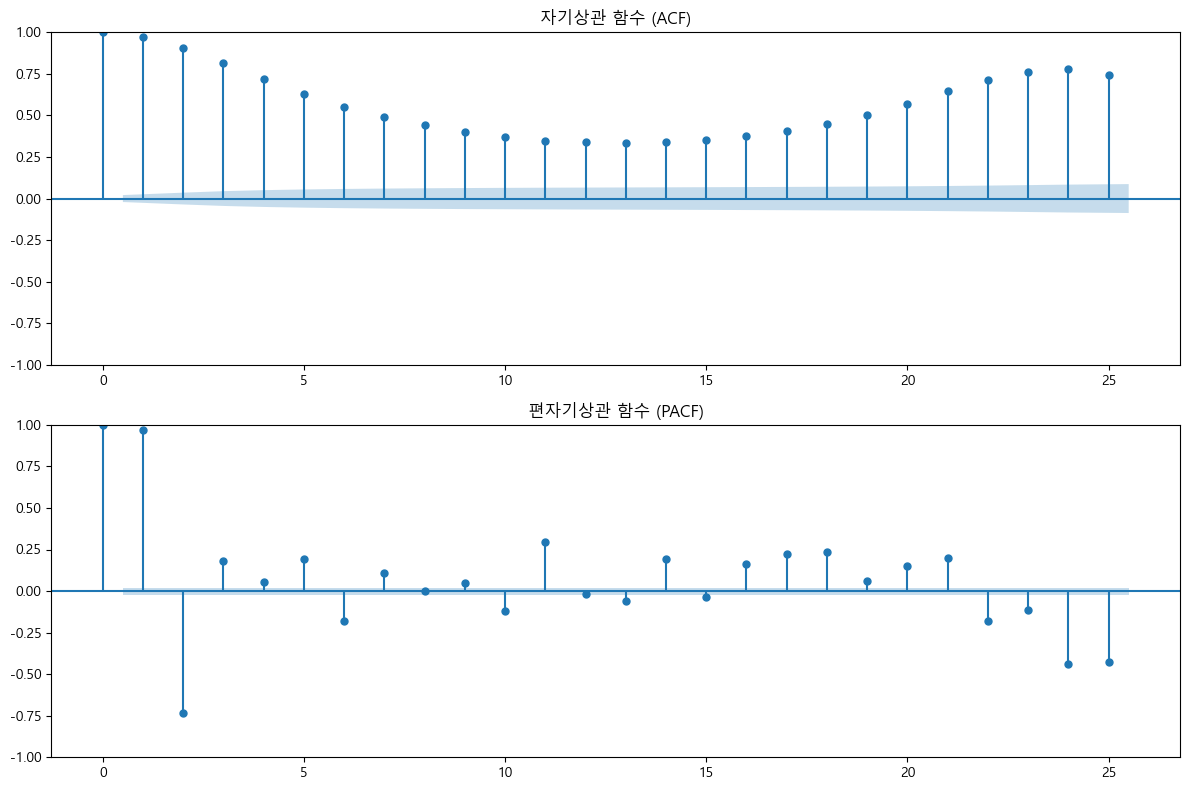

In [ ]:
# ACF, PACF 플롯
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(sample["시간"], lags=25, ax=ax1)
ax1.set_title("자기상관 함수 (ACF)")

# PACF
plot_pacf(sample["시간"], lags=25, ax=ax2)
ax2.set_title("편자기상관 함수 (PACF)")

plt.tight_layout()
plt.show()

## 계절성 플롯
 - 이중 계절성: 주황색 선이 규칙적임
 - 연간 계절성 외에 더 짧은 주기(주별, 일별) 계절성이 존재함

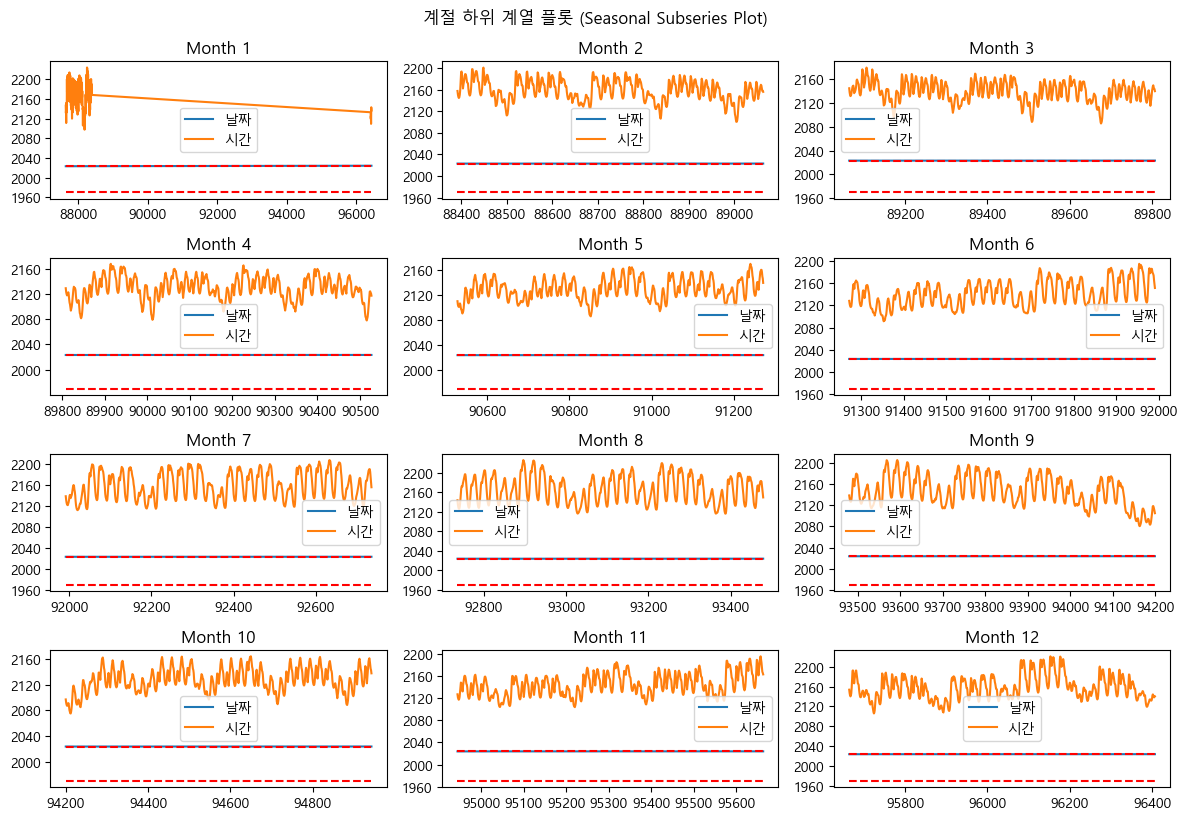

In [ ]:
# 월별 데이터 그룹화
data_monthly = sample.groupby(sample["날짜"].dt.month)

# 플롯 생성
plt.figure(figsize=(12, 8))
for month, group_data in data_monthly:
    plt.subplot(4, 3, month)
    group_data.plot(ax=plt.gca(), title=f"Month {month}")
    plt.hlines(
        group_data.mean(),
        group_data.index.min(),
        group_data.index.max(),
        color="r",
        linestyles="--",
    )
    plt.xlabel("")

plt.tight_layout()
plt.suptitle("계절 하위 계열 플롯 (Seasonal Subseries Plot)", y=1.02)
plt.show()

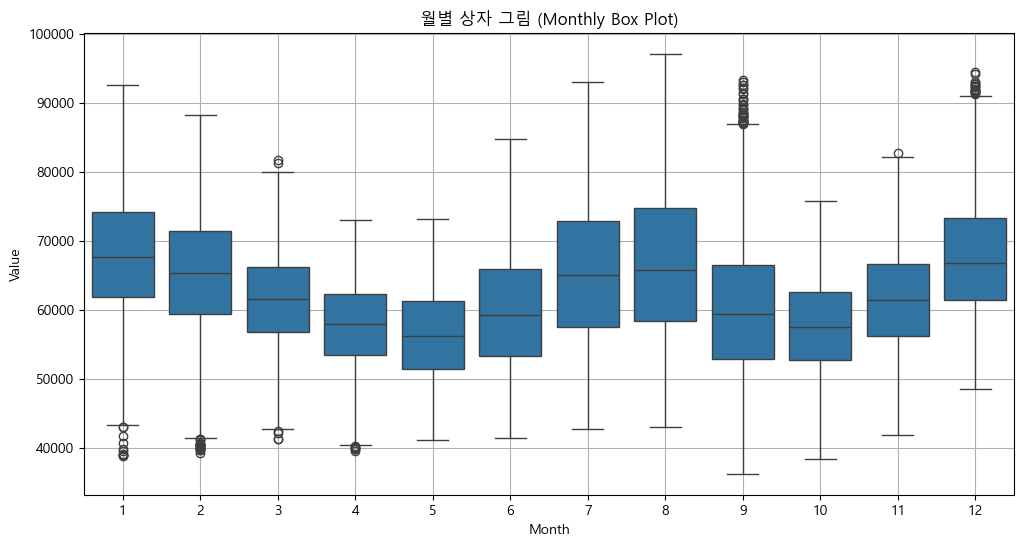

In [ ]:
# 월별 Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["날짜"].dt.month, y=df["시간"].values)
plt.title("월별 상자 그림 (Monthly Box Plot)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.show()